In [1]:
from numpy import random
import numpy as np
from scipy.stats import levy
from scipy.stats import norm
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import uniform
%matplotlib inline

## Generating random Number

In [2]:
x = np.random.rand(1000)

## Defining random sample generation

as showed on wikipidia: https://en.wikipedia.org/wiki/L%C3%A9vy_distribution#Random_sample_generation i define my own custom rgs implementing the cumulative distribution function (norm.ppf) from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

![title](./img.png)

In [3]:
def rsg(x, c = 1, mu = 0):
    return c / (pow(norm.ppf(1.0 - x),2)) + mu

In [4]:
levyArray = []

for i in range(0, len(x)):
    levyArray.append(rsg(x[i]))

In [5]:
print(levyArray[0:10])

[0.3512039610481218, 2.4291320461737835, 2.586671956113603, 5.375009804489759, 0.7744838964431762, 2.003105321628299, 0.9986598303018955, 4.506317685951488, 31.623308294065577, 5.009936560810234]


## Lévy-distribution

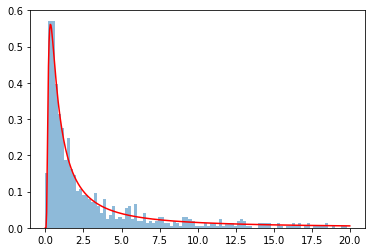

In [6]:
x = np.linspace(0, 20, 500)
ncd = levy.cdf(20)
plt.plot(x, levy.pdf(x)/ncd, 'r-')
plt.hist(levyArray, bins=100, range=(0,20), density=True, alpha=0.5)
plt.show()

By increasing the number of samples, the histogram tends towards the area below the curve

## Random walk in 2D

as mentioned here: https://stackoverflow.com/questions/51002508/how-to-limit-the-stepsize-using-pythons-scipy-stats-levy i applyed the levywalk function with the levy.pdf that i used

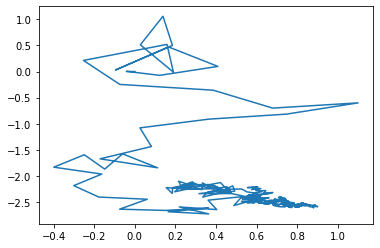

In [7]:
def levywalk( n ):
    angle = uniform.rvs( size=(n,), loc=.0, scale=2.*np.pi )
    a = np.cumsum( levy.pdf(x) / ncd * np.cos(angle) )
    b = np.cumsum(levy.pdf(x) / ncd* np.sin(angle) )
    return np.array( (a, b, levy.pdf(x)/ncd, angle) )

n = 500
walkArray = levywalk( n )

plt.plot(walkArray[0,:], walkArray[1,:])
plt.show()